In [1]:
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np

In [2]:
def fetch_price_data(crypto_id):
    """Fetch historical price data for a given cryptocurrency from the CoinGecko API."""
    url = f'https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart'
    params = {'vs_currency': 'usd', 'days': '365'}
    response = requests.get(url, params=params)
    data = json.loads(response.text)

    try:
        df = pd.DataFrame(data['prices'], columns=['time', f'{crypto_id}_price'])
        df['time'] = pd.to_datetime(df['time'], unit='ms')  # convert time to a readable format
        df.set_index('time', inplace=True)
        return df
    except KeyError:
        print(f"Price data not found for {crypto_id}. Skipping...")
        return None

def calculate_returns(df):
    """Calculate the daily returns for a DataFrame of price data."""
    
    return df.pct_change().dropna()

def generate_correlation_matrix(df):
    """Generate a correlation matrix for a DataFrame of returns data."""
    
    return df.corr()

def scale(df):
    df = df.dropna()
    return df / df.iloc[0]
    # return (df - df.median()) / df.mad()  # Median absolute deviation


# Plot normalized price series
def plot_normalized_data(df):
    plt.figure(figsize=(12, 8))
    for column in df.columns:
        plt.plot(df.index, df[column], label=column.replace('_price', ''))
    plt.title('Normalized Cryptocurrency Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price')
    plt.legend(loc='best')
    plt.show()

In [3]:
#create a list of all Zk related coins
response = requests.get('https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&category=zero-knowledge-zk&order=market_cap_desc&per_page=100&page=1&sparkline=false')

# Parse JSON response
data = response.json()

# Extract coin IDs
coin_ids = [coin['id'] for coin in data]

In [4]:
# for coin in coin_ids:
#     try:
#         output = fetch_price_data(coin)
#     except: 
#         print(f"Error fetching data for {coin}")
#         continue

In [5]:
# Add Bitcoin to the list of coins
cryptos = ['ethereum'] + coin_ids

# Fetch price data for all coins and filter out None returns
dfs = [fetch_price_data(crypto) for crypto in cryptos]
dfs = [df for df in dfs if df is not None]

# Concatenate all dataframes
df = pd.concat(dfs, axis=1).dropna()    

Price data not found for pirate-chain. Skipping...
Price data not found for degate. Skipping...
Price data not found for findora. Skipping...
Price data not found for railgun. Skipping...
Price data not found for zcoin. Skipping...
Price data not found for pivx. Skipping...
Price data not found for epic-cash. Skipping...
Price data not found for cheqd-network. Skipping...
Price data not found for zkspace. Skipping...
Price data not found for panther. Skipping...
Price data not found for calamari-network. Skipping...
Price data not found for everid. Skipping...
Price data not found for offshift. Skipping...
Price data not found for purefi. Skipping...
Price data not found for ycash. Skipping...
Price data not found for blackhat-coin. Skipping...
Price data not found for hush. Skipping...


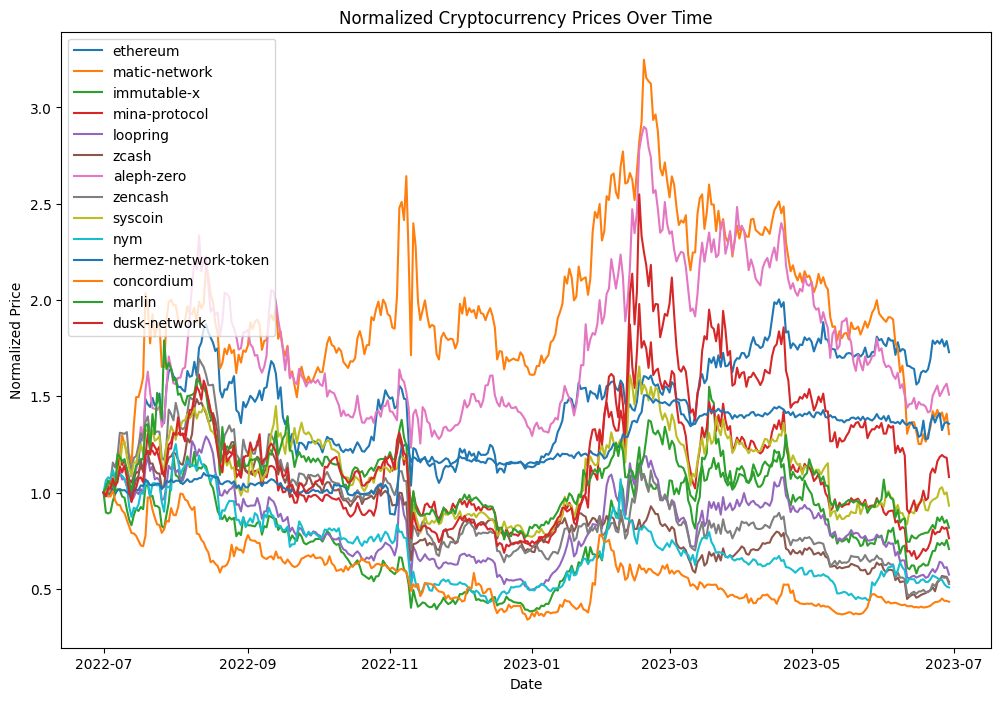

In [6]:
df_normalized = scale(df)
plot_normalized_data(df_normalized)

In [7]:
# Calculate returns for all coins
returns_df = calculate_returns(df)
# Generate a correlation matrix for the returns data
corr_matrix = generate_correlation_matrix(returns_df)

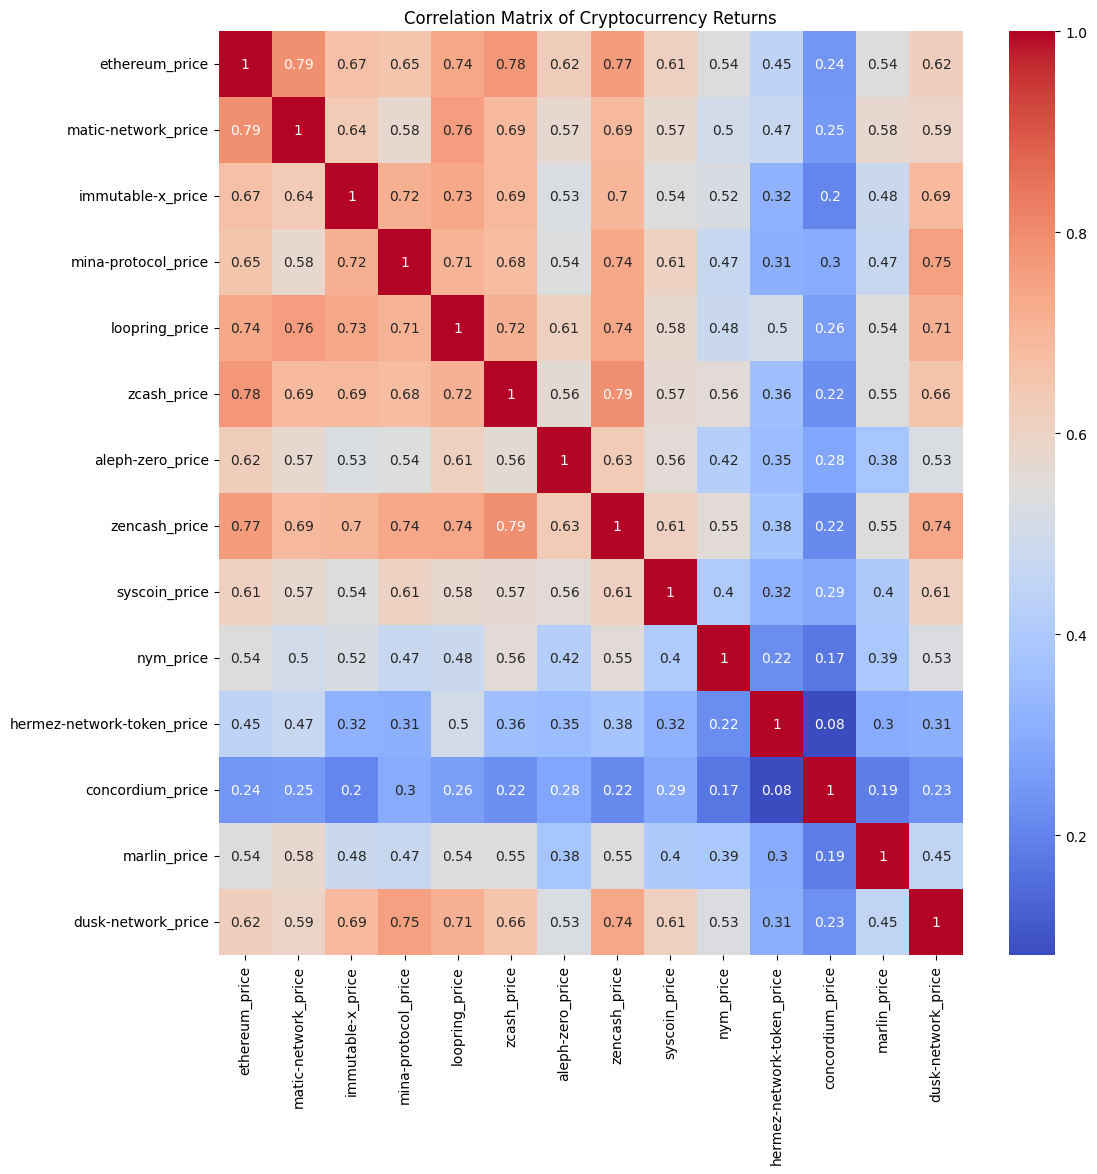

In [8]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix of Cryptocurrency Returns')
plt.show()


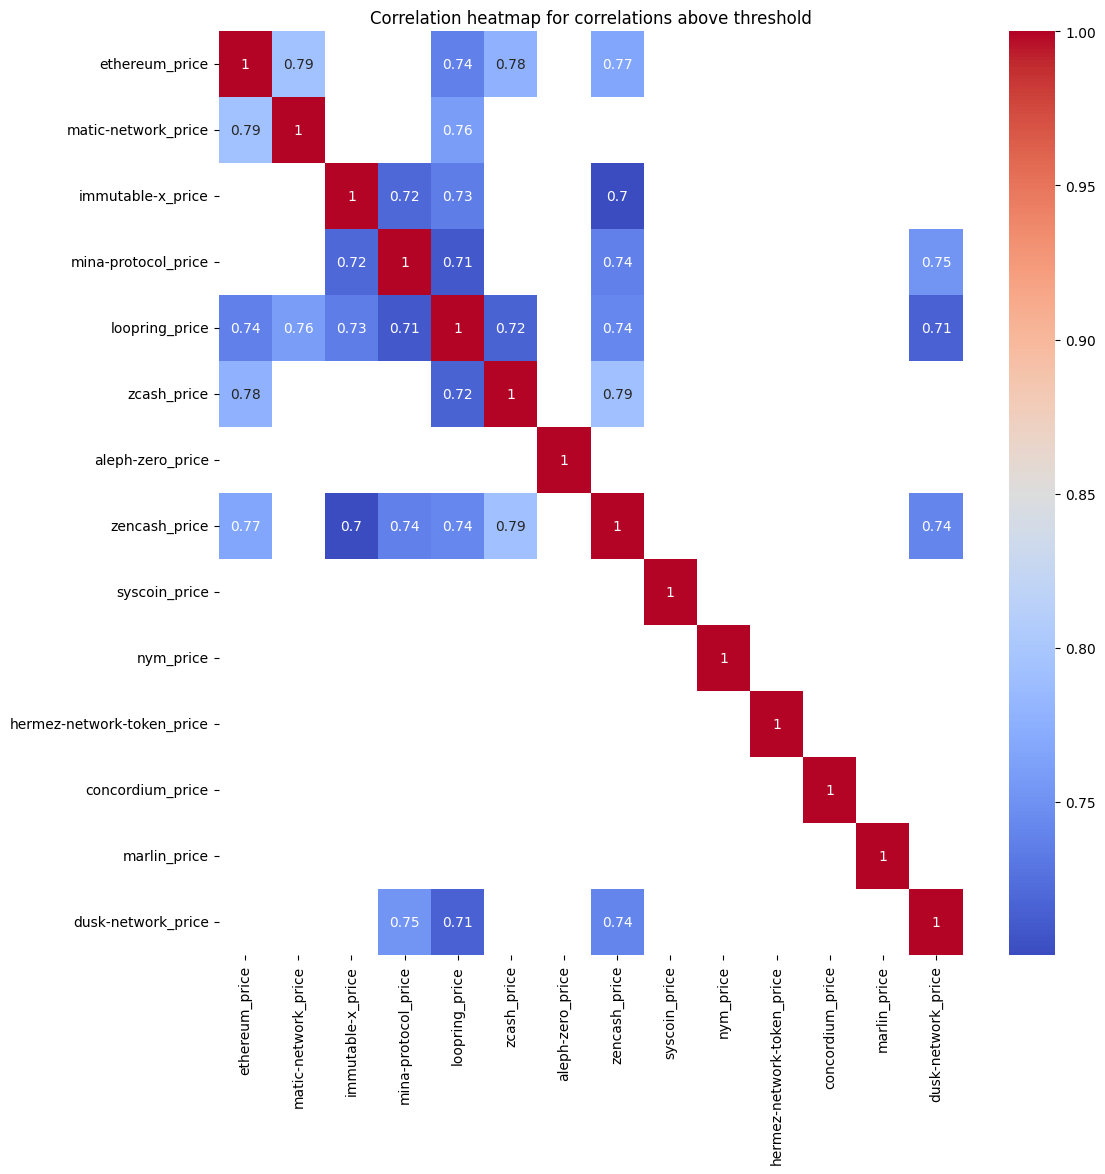

In [9]:
threshold = 0.7
mask_not_significant = np.abs(corr_matrix) < threshold

# Apply the mask to the correlation matrix
corr_masked = corr_matrix.mask(mask_not_significant)

# Create a heatmap with the masked correlation matrix
plt.figure(figsize=(12,12))
sns.heatmap(corr_masked, annot=True, cmap='coolwarm', mask=mask_not_significant)
plt.title('Correlation heatmap for correlations above threshold')
plt.show()

In [71]:
# # Set the threshold value
# threshold = 0.5

# # Create a boolean mask for the upper triangle (excluding the diagonal)
# mask_upper_triangle = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# # Extract correlations above the threshold and store them in a dictionary
# correlations_above_threshold = {}
# for row, col in zip(*np.where((np.abs(corr_matrix) * mask_upper_triangle) > threshold)):
#     correlations_above_threshold[(row, col)] = corr_matrix.iloc[row, col]

# print(correlations_above_threshold)


{(0, 1): 0.7204762997355012, (0, 2): 0.6820598972150981, (0, 3): 0.6758252193123089, (0, 4): 0.7245712721242523, (0, 5): 0.7516348045167259, (0, 6): 0.6316578684426193, (0, 7): 0.776193973176705, (0, 8): 0.6449431208796554, (0, 9): 0.5281384343732675, (0, 12): 0.5451588874018362, (0, 13): 0.6470375519629433, (0, 14): 0.576817482765714, (1, 2): 0.6350100101760466, (1, 3): 0.5769839981125375, (1, 4): 0.7596392608005472, (1, 5): 0.6864221562935163, (1, 6): 0.5741317568003976, (1, 7): 0.6905944312556339, (1, 8): 0.5741859993327051, (1, 12): 0.5766302005935505, (1, 13): 0.5911020730445276, (1, 14): 0.5113489497109254, (2, 3): 0.719106946927037, (2, 4): 0.7344841173374309, (2, 5): 0.6887813695083651, (2, 6): 0.5262652548743507, (2, 7): 0.7001393254393742, (2, 8): 0.5422446098730789, (2, 9): 0.5241768005088889, (2, 13): 0.68642792377595, (3, 4): 0.7083664029852176, (3, 5): 0.6799256490514848, (3, 6): 0.5373654734635605, (3, 7): 0.7375124515056692, (3, 8): 0.6080938863218613, (3, 13): 0.752539